## Introduction to Python for Physical Oceanography

There are a lot of useful python tutorials out there, but few that really focus on the tools and types of workflows that are commonly employed when doing data analysis in physical oceanography. Here we'll go over some of the basic tools and how you'd might use them to load data, make figures, and do scientific analysis. More resources for learning python in general can be found [here] and [here]

### Scientific Computing

In [1]:
import numpy as np

The haversine formula calculates the great-circle distance between two points on a sphere:

$$
a = \sin^2\left(\frac{\Delta\phi}{2}\right) + \cos(\phi_1)\cos(\phi_2)\sin^2\left(\frac{\Delta\lambda}{2}\right)
$$

$$
c = 2 \arcsin\left( \sqrt{a} \right)
$$

$$
d = R \cdot c
$$

where:

- \( $\phi_1, \phi_2$ \) are the latitudes in radians  
- $\Delta\phi = \phi_2 - \phi_1$ is the difference in latitude  
- $\Delta\lambda = \lambda_2 - \lambda_1$ is the difference in longitude  
- $R$ is Earth’s radius (≈ 6367 km)


In [2]:
def haversine_np(coord1, coord2):
    """
    Calculate the great-circle distance between two points 
    on the earth (specified in decimal degrees), given as (lat, lon) tuples.

    Args:
        coord1: tuple (lat1, lon1)
        coord2: tuple (lat2, lon2)

    Returns:
        Distance in kilometers.
    """
    lat1, lon1 = np.radians(coord1)
    lat2, lon2 = np.radians(coord2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat / 2.0) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2.0) ** 2
    c = 2 * np.arcsin(np.sqrt(a))
    
    km = 6367 * c  # Earth's radius in km
    return km

In [3]:
# live code this
# Coordinates: (lat, lon)
accra = (5.6037, -0.1870)          # Accra, Ghana
woods_hole = (41.5265, -70.6737)   # Woods Hole, MA, USA

distance_km = haversine_np(accra, woods_hole)
print(f"Great-circle distance: {distance_km:.2f} km")

Great-circle distance: 7970.24 km


### Loading Data

In physical oceanography, we're often working with large datasets that are *geo-referenced* - arrays of physical variables like temperature and salinity in which each measurement has a latitude and longitude coordinate. Data structured this way is often packaged in "NetCDF" format (file extension ".nc") and can be read by several python packages. One of the most commonly used is **xarray** [link to xarray github and include some of their info about it]

In [6]:
import xarray as xr
import fsspec
import json

The data we're going to use in this workshop is hosted online at a url. Data can be directly downloaded from online servers `code that downloads data from a server - wget?` but in this case we will simply "stream" the data instead of doing a direct download. The urls for all the netCDFs are stored in the attached JSON file (this is only slightly fancier than a plain text file in that it allows us to group like-files together, but a simple text file of urls would also work fine). JSON files can be read with the follow command:

In [12]:
with open("./data/data_manifest_January.json", "r") as f:
    manifest = json.load(f)

We can then loop through the urls in the manifest and open them in **xarray**

In [ ]:
# choose data type and optional density contour flag
data_type = 'ctd'
density_contour = False

# load main datasets
datasets = []
for url in manifest.get(data_type, []):
    with fsspec.open(url, mode='rb') as f:
        ds = xr.open_dataset(f, decode_timedelta=True) # flag decode_timedelta=True to suppress warnings
        datasets.append(ds)

# load optional CTD datasets for density contour
datasets_ctd = []
if density_contour and data_type != 'ctd':
    for url in manifest.get('ctd', []):
        with fsspec.open(url, mode='rb') as f:
            ds = xr.open_dataset(f, decode_timedelta=True)
            datasets_ctd.append(ds)


/tmp/ipykernel_553210/3259604366.py:9: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(f)
/tmp/ipykernel_553210/3259604366.py:9: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timed

Loaded 42 CTD files


/tmp/ipykernel_553210/3259604366.py:9: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timedeltas based on the presence of a timedelta-like units attribute, users will need to explicitly opt-in by passing True or CFTimedeltaCoder(decode_via_units=True) to decode_timedelta. To silence this warning, set decode_timedelta to True, False, or a 'CFTimedeltaCoder' instance.
  ds = xr.open_dataset(f)
/tmp/ipykernel_553210/3259604366.py:9: FutureWarning: In a future version, xarray will not decode timedelta values based on the presence of a timedelta-like units attribute by default. Instead it will rely on the presence of a timedelta64 dtype attribute, which is now xarray's default way of encoding timedelta64 values. To continue decoding timed

In [26]:
datasets[0].P.values

array([ 11.64289312,  11.76066653,  11.86185118,  11.97552827,
        12.08768652,  12.20712862,  12.34774027,  12.46243352,
        12.59614661,  12.74158926,  12.89091771,  13.02470437,
        13.16832254,  13.30863308,  13.44793505,  13.59360811,
        13.73443843,  13.87905174,  14.01632118,  14.15259524,
        14.28986425,  14.42820673,  14.57106619,  14.70606355,
        14.83293734,  14.98673267,  15.14560874,  15.28562838,
        15.43638604,  15.57368985,  15.72773014,  15.87514601,
        16.02188391,  16.17484484,  16.31851627,  16.47055667,
        16.63245099,  16.78469113,  16.93694888,  17.09435111,
        17.25198397,  17.40933366,  17.5544582 ,  17.70643861,
        17.85801198,  18.00552452,  18.1636085 ,  18.31027961,
        18.4600788 ,  18.60266462,  18.75348176,  18.90753005,
        19.05502285,  19.19280239,  19.35955399,  19.49485574,
        19.64664916,  19.78854623,  19.94370261,  20.09111234,
        20.23836122,  20.40557531,  20.56167917,  20.71

### Visualizing Data

To visualize this data, we can use **matplotlib.pyplot**.

In [28]:
import matplotlib.pyplot as plt

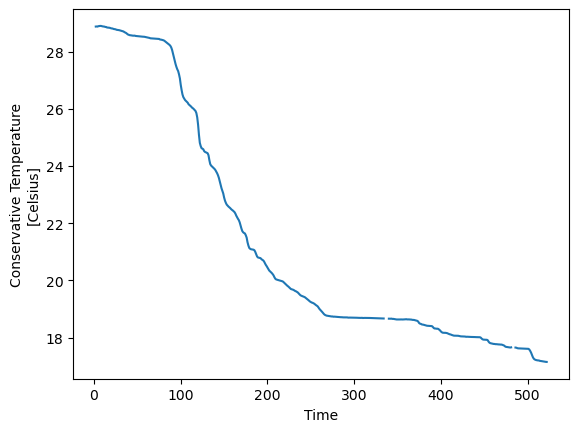

In [ ]:
# plot a single profile temperature, salinity, chlorophyll, oxygen
datasets[0].CT.plot(label='Temperature')

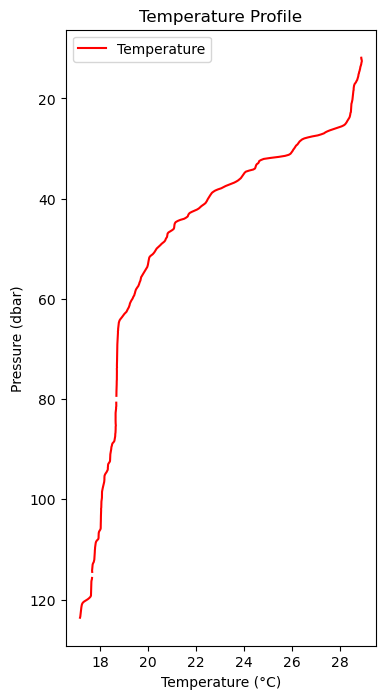

In [36]:
index = 0

temperature = datasets[index].CT
pressure = datasets[index].P

plt.figure(figsize=(4, 8))
plt.plot(temperature, pressure, label='Temperature', color='red')
plt.gca().invert_yaxis()  
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (dbar)')
plt.title('Temperature Profile')
plt.legend()

### Geophysical Data Analysis

In [ ]:
import cartopy.crs as ccrs

# plot the location of the transect with isobath contours? do not try to live code this lol or maybe include the scafolding

In [ ]:
import gsw
# plot density. plot N^2

In [ ]:
# have the students plot the average? or i just show the average plots?

# 'January', 'April', 'August'
cruise = 'April'

data_type = 'ctd'

wkdir = f"{os.environ['WINPATH']}/OneDrive - Massachusetts Institute of Technology/mit-whoi/gulf_of_guinea/coessing_2025/EcoCTD_data/{cruise}/"
data = glob.glob(wkdir + '*' + data_type + '.nc')

datasets = [xr.open_dataset(f, decode_timedelta=True) for f in data]

max_depth = 80
depth_grid = np.linspace(10, max_depth, 50)  # Define a common depth grid

# Initialize arrays to store interpolated values
CT_interp = np.full((len(datasets), len(depth_grid)), np.nan)
SA_interp = np.full((len(datasets), len(depth_grid)), np.nan)
sigma_interp = np.full((len(datasets), len(depth_grid)), np.nan)

# Interpolate each profile onto the common depth grid
for i, ds in enumerate(datasets):
    p = ds["P"].values
    ct = ds["CT"].values
    sa = ds["SA"].values
    
    p = interpolate_nans(p, np.arange(len(p)))
    ct = interpolate_nans(ct, np.arange(len(ct)))
    sa = interpolate_nans(sa, np.arange(len(sa)))
    
    # Interpolate to the common depth grid
    CT_interp[i, :] = np.interp(depth_grid, p, ct, left=np.nan, right=np.nan)
    SA_interp[i, :] = np.interp(depth_grid, p, sa, left=np.nan, right=np.nan)

    # compute protential density for each profile
    sigma_interp[i, :] = gsw.density.sigma0(SA_interp[i, :], CT_interp[i, :])

# Compute the mean profile and std
CT_mean = np.nanmean(CT_interp, axis=0)
CT_std  = np.nanstd(CT_interp, axis=0)

SA_mean = np.nanmean(SA_interp, axis=0)
SA_std  = np.nanstd(SA_interp, axis=0)

sigma_mean = np.nanmean(sigma_interp, axis=0)
sigma_std  = np.nanstd(sigma_interp, axis=0)


# Create figure
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(7, 6))

# Plot mean profiles with variance
ax1.plot(CT_mean, depth_grid, 'b', linewidth=2, label="Mean")
ax1.fill_betweenx(depth_grid, CT_mean - CT_std, CT_mean + CT_std, color='b', alpha=0.2, linewidth=0)

ax2.plot(SA_mean, depth_grid, 'r', linewidth=2, label="Mean")
ax2.fill_betweenx(depth_grid, SA_mean - SA_std, SA_mean + SA_std, color='r', alpha=0.2, linewidth=0)

ax3.plot(sigma_mean, depth_grid, 'purple', linewidth=2, label="Mean")
ax3.fill_betweenx(depth_grid, sigma_mean - sigma_std, sigma_mean + sigma_std, color='purple', alpha=0.2, linewidth=0)


# Formatting axes
ax1.set_ylabel('Pressure (dbar)') # 'Pressure (dbar)', 'Depth (m)'
ax1.set_xlabel('Conservative Temperature (°C)')
ax1.set_ylim(12, max_depth)
ax1.set_xlim(15, 30)

ax2.set_xlabel('Absolute Salinity (g/kg)')
ax2.set_yticks([])
ax2.set_ylim(12, max_depth)
ax2.set_xlim(34.5, 36.5)

ax3.set_xlabel('Potential Density (kg/m$^3$)')
ax3.set_yticks([])
ax3.set_ylim(12, max_depth)
ax3.set_xlim(21, 28)

ax1.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()

fig.suptitle(f"{cruise} Sakumono CTD profiles")
plt.tight_layout()
plt.show()